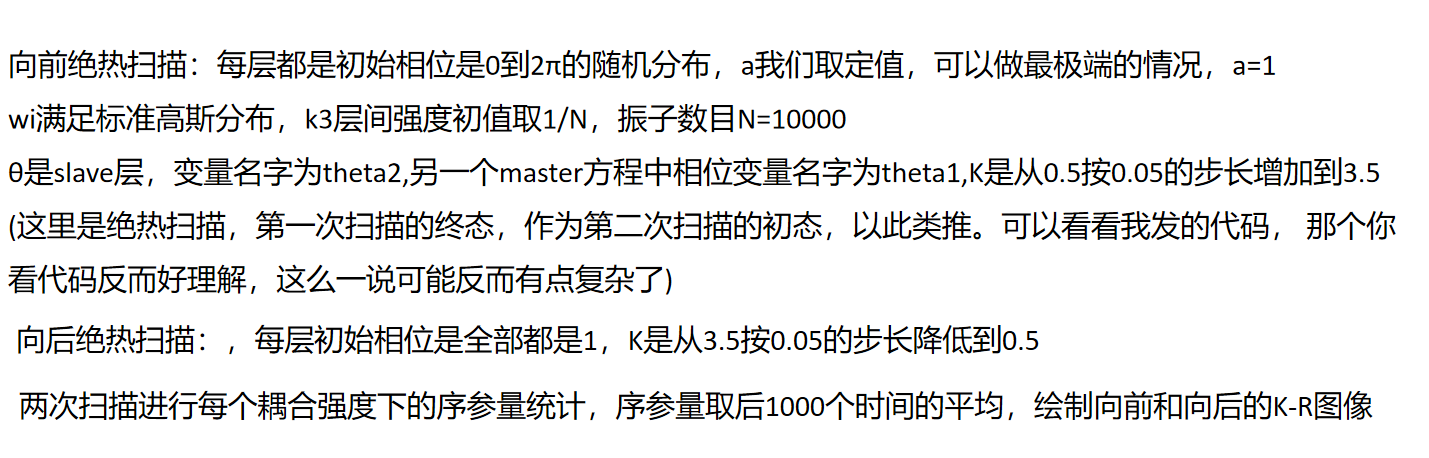

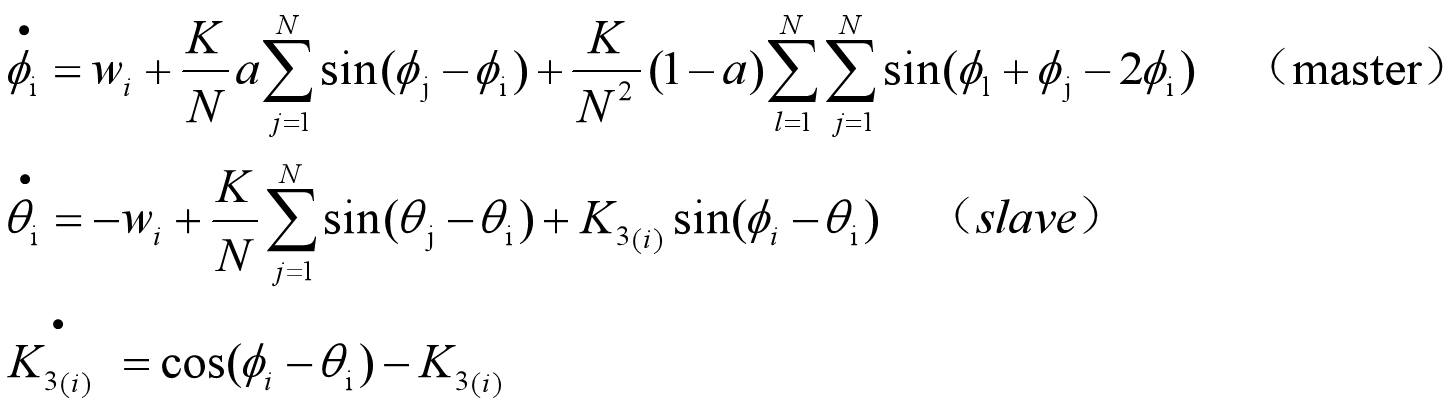

In [1]:
import numpy as np
import numba as nb
import matplotlib.pyplot as plt
from scipy.integrate import odeint

@nb.njit
def point_variable(variable: np.ndarray, t, agentsNum: int, omega: np.ndarray, 
                   Kstart: float, Kend: float, a: float, maxTime: float):
    K = t / maxTime * (Kend - Kstart) + Kstart
    print(t, K, a)
    phi, theta, K3 = variable[:agentsNum], variable[agentsNum:2*agentsNum], variable[2*agentsNum:]
    otherPhis = np.repeat(phi, agentsNum).reshape(agentsNum, agentsNum)
    otherThetas = np.repeat(theta, agentsNum).reshape(agentsNum, agentsNum)
    dphi = (
        omega 
        + K / agentsNum * a * np.sum(np.sin(otherPhis - phi), axis=0)
        # + K / agentsNum**2 * (1 - a) * 
    )
    dtheta = (
        -omega 
        + K / agentsNum * np.sum(np.sin(otherThetas - theta), axis=0) 
        + K3 * np.sin(phi - theta) 
    )
    dK3 = np.cos(phi - theta) - K3

    return np.concatenate((dphi, dtheta, dK3))

In [ ]:
agentsNum = 100
dt = 0.1
Kstart, Kend = 0.5, 3.5
tRange = np.arange(0, dt * 35000, dt)
omega = np.random.normal(0, 1, agentsNum)
a = 1

variable0 = np.concatenate([
    np.random.uniform(0, 2*np.pi, agentsNum),
    np.random.uniform(0, 2*np.pi, agentsNum),
    np.ones(agentsNum) / agentsNum
])

variable = odeint(point_variable, variable0, tRange, args=(agentsNum, omega, Kstart, Kend, a, tRange[-1]))

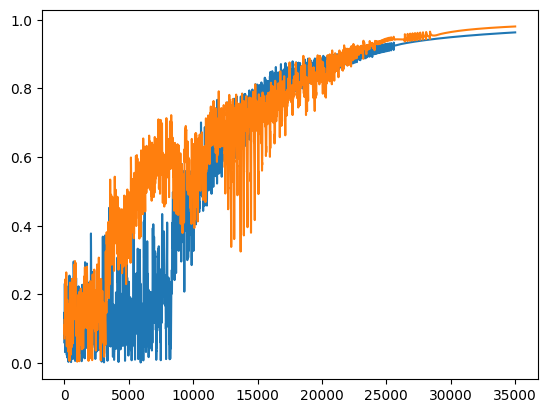

In [3]:
phis = variable[:, :agentsNum]
thetas = variable[:, agentsNum:2*agentsNum]
K3s = variable[:, 2*agentsNum:]
r1 = np.abs(np.sum(np.exp(1j * phis), axis=1)) / agentsNum
r2 = np.abs(np.sum(np.exp(1j * thetas), axis=1)) / agentsNum
plt.plot(r1)
plt.plot(r2)